In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
cd /content/gdrive/My Drive/Colab Notebooks Resources/Audio-Signal-Feature-Extraction-And-Clustering

/content/gdrive/My Drive/Colab Notebooks Resources/Audio-Signal-Feature-Extraction-And-Clustering


In [ ]:
%ls

'ADReSS data'/           knnSMtemp                 svmRegression_mmseScoreMEANS
 all4FeauturenLabels.p   knnSMtemp.arff            svmSMtemp
 buckets/                README.md                 svmSMtemp.arff
 Cluster.py              requirements.txt          svmSMtempMEANS
 configuration/          results/
 DataHandler.py          svmRegression_mmseScore


In [ ]:
pip install mir_eval pyAudioAnalysis eyed3 pydub 

     |████████████████████████████████| 87 kB 4.3 MB/s 
     |████████████████████████████████| 52.4 MB 54 kB/s 
     |████████████████████████████████| 245 kB 34.0 MB/s 
     |████████████████████████████████| 242 kB 49.3 MB/s 
  Created wheel for mir-eval: filename=mir_eval-0.6-py3-none-any.whl size=96514 sha256=b457a1fe502c0b3aa5b9a4120d522a1053a4371048d9c353f9dcfdb1dc26bb42
  Stored in directory: /root/.cache/pip/wheels/08/28/2d/006dbad29550bac8daf049ff34fa882655a7d3e77f3b67595e
  Created wheel for pyAudioAnalysis: filename=pyAudioAnalysis-0.3.7-py3-none-any.whl size=52589872 sha256=c4eae89742fc3946bbf2f72ce500b6bdced723a47d91441d37b46cc893552a1f
  Stored in directory: /root/.cache/pip/wheels/13/5f/c1/647e78637aad4cc6a8fe907d4a1a2f86a148b70c73efd307c4
Successfully built mir-eval pyAudioAnalysis
  Attempting uninstall: coverage
    Found existing installation: coverage 3.7.1
    Uninstalling coverage-3.7.1:
      Successfully uninstalled coverage-3.7.1
ERROR: pip's dependency resolv

In [ ]:
from pyAudioAnalysis import MidTermFeatures as aF
from pyAudioAnalysis import audioTrainTest as aT
import glob
import csv
import os
baseDir = './ADReSS data/ADReSS-IS2020-data/train/norm_wave_sorted/real mmse scores'
folder_name = baseDir 
features2, _, filenames2 = aF.directory_feature_extraction(baseDir, 1.0, 1.0,
                                                 aT.shortTermWindow, aT.shortTermStep,
                                                 compute_beat=False)

Analyzing file 1 of 2800: ./ADReSS data/ADReSS-IS2020-data/train/norm_wave_sorted/real mmse scores/S002-8-11581-13575-1-950-1500.wav
Analyzing file 2 of 2800: ./ADReSS data/ADReSS-IS2020-data/train/norm_wave_sorted/real mmse scores/S002-8-13575-15121-1-100-790.wav
Analyzing file 3 of 2800: ./ADReSS data/ADReSS-IS2020-data/train/norm_wave_sorted/real mmse scores/S002-8-15121-16717-1-0-1600.wav
Analyzing file 4 of 2800: ./ADReSS data/ADReSS-IS2020-data/train/norm_wave_sorted/real mmse scores/S002-8-16717-19160-1-2200-2450.wav
Analyzing file 5 of 2800: ./ADReSS data/ADReSS-IS2020-data/train/norm_wave_sorted/real mmse scores/S002-8-19160-23184-1-0-310.wav
Analyzing file 6 of 2800: ./ADReSS data/ADReSS-IS2020-data/train/norm_wave_sorted/real mmse scores/S002-8-19160-23184-2-2560-3190.wav
Analyzing file 7 of 2800: ./ADReSS data/ADReSS-IS2020-data/train/norm_wave_sorted/real mmse scores/S002-8-23184-27938-1-1970-3170.wav
Analyzing file 8 of 2800: ./ADReSS data/ADReSS-IS2020-data/train/norm_wa

In [ ]:
f = features2
fn = _
feature_names = filenames2
features_Real = []
class_names = []
file_names = []

for i, d in enumerate([baseDir]):
  if f.shape[0] > 0:
      # if at least one audio file has been found in the provided folder:
      features_Real.append(f)
      file_names.append(fn)
      if d[-1] == os.sep:
          class_names.append(d.split(os.sep)[-2])
      else:
          class_names.append(d.split(os.sep)[-1])

In [ ]:
print('Features2: {}'.format(len(features2)))
print('Filenames2: {}'.format(len(filenames2)))

print('Filenames2 Len: {}'.format(filenames2))

features = features2
filenames = filenames2

Features2: 2798
Filenames2: 136
Filenames2 Len: ['zcr_mean', 'energy_mean', 'energy_entropy_mean', 'spectral_centroid_mean', 'spectral_spread_mean', 'spectral_entropy_mean', 'spectral_flux_mean', 'spectral_rolloff_mean', 'mfcc_1_mean', 'mfcc_2_mean', 'mfcc_3_mean', 'mfcc_4_mean', 'mfcc_5_mean', 'mfcc_6_mean', 'mfcc_7_mean', 'mfcc_8_mean', 'mfcc_9_mean', 'mfcc_10_mean', 'mfcc_11_mean', 'mfcc_12_mean', 'mfcc_13_mean', 'chroma_1_mean', 'chroma_2_mean', 'chroma_3_mean', 'chroma_4_mean', 'chroma_5_mean', 'chroma_6_mean', 'chroma_7_mean', 'chroma_8_mean', 'chroma_9_mean', 'chroma_10_mean', 'chroma_11_mean', 'chroma_12_mean', 'chroma_std_mean', 'delta zcr_mean', 'delta energy_mean', 'delta energy_entropy_mean', 'delta spectral_centroid_mean', 'delta spectral_spread_mean', 'delta spectral_entropy_mean', 'delta spectral_flux_mean', 'delta spectral_rolloff_mean', 'delta mfcc_1_mean', 'delta mfcc_2_mean', 'delta mfcc_3_mean', 'delta mfcc_4_mean', 'delta mfcc_5_mean', 'delta mfcc_6_mean', 'delta m

In [ ]:
import numpy as np

features = features_Real
filenames = file_names

features = features[0]
filenames = [os.path.basename(f) for f in filenames[0]]
f_final = []

# Read CSVs:
csv_files = glob.glob(folder_name + os.sep + "*.csv")
regression_labels = []
regression_names = []
f_final = []
for c in csv_files:
    cur_regression_labels = []
    f_temp = []
    # open the csv file that contains the current target value's annotations
    with open(c, 'rt') as csvfile:
        csv_reader = csv.reader(csvfile, delimiter=',', quotechar='|')
        for row in csv_reader:
            if len(row) == 2:
                # ... and if the current filename exists
                # in the list of filenames
                if row[0] in filenames:
                    index = filenames.index(row[0])
                    cur_regression_labels.append(float(row[1]))
                    f_temp.append(features[index, :])
                else:
                    print("Warning: {} not found "
                          "in list of files.".format(row[0]))
            else:
                print("Warning: Row with unknown format in regression file")
    f_final.append(np.array(f_temp))
    # cur_regression_labels is the list of values
    # for the current regression problem
    regression_labels.append(np.array(cur_regression_labels))
    # regression task name
    regression_names.append(os.path.basename(c).replace(".csv", ""))
    if len(features) == 0:
        print("ERROR: No data found in any input folder!")

In [ ]:
f_final[0].shape

(2798, 136)

In [ ]:

features_norm, mean, std = aT.normalize_features([f_final[0]])

n_samples = regression_labels[0].shape[0]
features_norm2 = features_norm[0]
per_train = 0.9
for e in range(100): 
  randperm = np.random.permutation(range(n_samples))
  n_train = int(round(per_train * n_samples))
  f_train = [features_norm2[randperm[i]] for i in range(n_train)]
  f_test = [features_norm2[randperm[i+n_train]] for i in range(n_samples - n_train)]
  l_train = [regression_labels[0][randperm[i]] for i in range(n_train)]
  l_test = [regression_labels[0][randperm[i + n_train]] for i in range(n_samples - n_train)]                    
  f_train = np.matrix(f_train) 

In [20]:
#classifier, _ = aT.train_svm_regression(f_train, l_train, .01)
classifier, _ = aT.train_random_forest_regression(f_train, l_train, 100)

In [21]:
import sklearn
import math

predicted = []
actual = l_test

for itest, fTest in enumerate(f_test):
  #R = aT.regression_wrapper(classifier, 'svm', fTest)
  R = aT.regression_wrapper(classifier, 'randomforest', fTest)
  predicted.append(R)

mse = sklearn.metrics.mean_squared_error(actual, predicted)

rmse = math.sqrt(mse)



print(rmse)

7.638124138631347


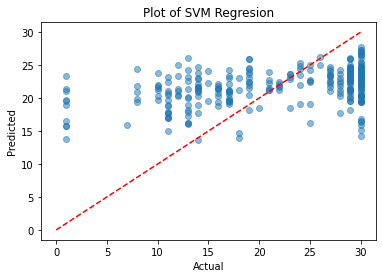

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
#np.random.seed(19680801)


N = 280
x = actual
y = predicted
#colors = np.random.rand(N)
#plt.plot(x, 30, linestyle='solid')
plt.scatter(x, y, alpha=0.5)
x = [0,30]
y = [0,30]
plt.xlabel('Actual') 
plt.ylabel('Predicted')
plt.title('Plot of SVM Regresion')
plt.plot(x, y, color='red',linestyle='dashed')
plt.show()

In [18]:
from pyAudioAnalysis import audioTrainTest as aT
import os
baseDir = './ADReSS data/ADReSS-IS2020-data/train/norm_wave_sorted/real mmse scores'

aT.feature_extraction_train_regression(baseDir, 1.0, 1.0, aT.shortTermWindow, aT.shortTermStep, "randomforest", "randomforestRegress", False)

Analyzing file 1 of 2800: ./ADReSS data/ADReSS-IS2020-data/train/norm_wave_sorted/real mmse scores/S002-8-11581-13575-1-950-1500.wav
Analyzing file 2 of 2800: ./ADReSS data/ADReSS-IS2020-data/train/norm_wave_sorted/real mmse scores/S002-8-13575-15121-1-100-790.wav
Analyzing file 3 of 2800: ./ADReSS data/ADReSS-IS2020-data/train/norm_wave_sorted/real mmse scores/S002-8-15121-16717-1-0-1600.wav
Analyzing file 4 of 2800: ./ADReSS data/ADReSS-IS2020-data/train/norm_wave_sorted/real mmse scores/S002-8-16717-19160-1-2200-2450.wav
Analyzing file 5 of 2800: ./ADReSS data/ADReSS-IS2020-data/train/norm_wave_sorted/real mmse scores/S002-8-19160-23184-1-0-310.wav
Analyzing file 6 of 2800: ./ADReSS data/ADReSS-IS2020-data/train/norm_wave_sorted/real mmse scores/S002-8-19160-23184-2-2560-3190.wav
Analyzing file 7 of 2800: ./ADReSS data/ADReSS-IS2020-data/train/norm_wave_sorted/real mmse scores/S002-8-23184-27938-1-1970-3170.wav
Analyzing file 8 of 2800: ./ADReSS data/ADReSS-IS2020-data/train/norm_wa

([49.82318744642858], [60.738318706696106], [100])

In [ ]:
from pyAudioAnalysis import audioTrainTest as aT
import os
baseDir = './ADReSS data/ADReSS-IS2020-data/train/norm_wave_sorted/real mmse scores'


aT.feature_extraction_train_regression(baseDir, 1.0, 1.0, aT.shortTermWindow, aT.shortTermStep, "svm", "svmRegression", False)


Analyzing file 1 of 2800: ./ADReSS data/ADReSS-IS2020-data/train/norm_wave_sorted/real mmse scores/S002-8-11581-13575-1-950-1500.wav
Analyzing file 2 of 2800: ./ADReSS data/ADReSS-IS2020-data/train/norm_wave_sorted/real mmse scores/S002-8-13575-15121-1-100-790.wav
Analyzing file 3 of 2800: ./ADReSS data/ADReSS-IS2020-data/train/norm_wave_sorted/real mmse scores/S002-8-15121-16717-1-0-1600.wav
Analyzing file 4 of 2800: ./ADReSS data/ADReSS-IS2020-data/train/norm_wave_sorted/real mmse scores/S002-8-16717-19160-1-2200-2450.wav
Analyzing file 5 of 2800: ./ADReSS data/ADReSS-IS2020-data/train/norm_wave_sorted/real mmse scores/S002-8-19160-23184-1-0-310.wav
Analyzing file 6 of 2800: ./ADReSS data/ADReSS-IS2020-data/train/norm_wave_sorted/real mmse scores/S002-8-19160-23184-2-2560-3190.wav
Analyzing file 7 of 2800: ./ADReSS data/ADReSS-IS2020-data/train/norm_wave_sorted/real mmse scores/S002-8-23184-27938-1-1970-3170.wav
Analyzing file 8 of 2800: ./ADReSS data/ADReSS-IS2020-data/train/norm_wa

([55.915360340735425], [61.11826565535137], [0.01])

In [ ]:
import os
baseDir = './ADReSS data/ADReSS-IS2020-data/train/norm_wave_sorted/real mmse scores'

len(os.listdir(baseDir)) cx

2801

In [19]:
type(os.listdir(baseDir))

list

In [ ]:
import shutil

shutil.copy('./ADReSS data/ADReSS-IS2020-data/train/cc_meta_data.txt' , './ADReSS data/ADReSS-IS2020-data/train/norm_wave_sorted/mmse scores/cc_meta_data.csv')
shutil.copy('./ADReSS data/ADReSS-IS2020-data/train/cd_meta_data.txt' , './ADReSS data/ADReSS-IS2020-data/train/norm_wave_sorted/mmse scores/cd_meta_data.csv')

'./ADReSS data/ADReSS-IS2020-data/train/norm_wave_sorted/mmse scores/cd_meta_data.csv'

In [ ]:
from pyAudioAnalysis import audioTrainTest as aT
early = './ADReSS data/ADReSS-IS2020-data/train/norm_wave_sorted/early'
moderate = './ADReSS data/ADReSS-IS2020-data/train/norm_wave_sorted/moderate'
norm = './ADReSS data/ADReSS-IS2020-data/train/norm_wave_sorted/norm'
severe = './ADReSS data/ADReSS-IS2020-data/train/norm_wave_sorted/severe'

from pyAudioAnalysis import MidTermFeatures as aF
features, class_names, _ = aF.multiple_directory_feature_extraction([norm,early,moderate,severe], 1.0, 1.0,
                                                 aT.shortTermWindow, aT.shortTermStep,
                                                 compute_beat=False)

Analyzing file 1 of 1398: ./ADReSS data/ADReSS-IS2020-data/train/norm_wave_sorted/norm/S002-8-11581-13575-1-950-1500.wav
Analyzing file 2 of 1398: ./ADReSS data/ADReSS-IS2020-data/train/norm_wave_sorted/norm/S002-8-13575-15121-1-100-790.wav
Analyzing file 3 of 1398: ./ADReSS data/ADReSS-IS2020-data/train/norm_wave_sorted/norm/S002-8-15121-16717-1-0-1600.wav
Analyzing file 4 of 1398: ./ADReSS data/ADReSS-IS2020-data/train/norm_wave_sorted/norm/S002-8-16717-19160-1-2200-2450.wav
Analyzing file 5 of 1398: ./ADReSS data/ADReSS-IS2020-data/train/norm_wave_sorted/norm/S002-8-19160-23184-1-0-310.wav
Analyzing file 6 of 1398: ./ADReSS data/ADReSS-IS2020-data/train/norm_wave_sorted/norm/S002-8-19160-23184-2-2560-3190.wav
Analyzing file 7 of 1398: ./ADReSS data/ADReSS-IS2020-data/train/norm_wave_sorted/norm/S002-8-23184-27938-1-1970-3170.wav
Analyzing file 8 of 1398: ./ADReSS data/ADReSS-IS2020-data/train/norm_wave_sorted/norm/S002-8-23184-27938-2-4100-4450.wav
Analyzing file 9 of 1398: ./ADReSS

In [ ]:
feature_matrix, labels = aT.features_to_matrix(features)

In [ ]:
import pickle
featnLabel = [feature_matrix, labels]
pickle.dump( featnLabel, open( "all4FeauturenLabels.p", "wb" ) )

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(feature_matrix, labels, test_size=0.05, random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(solver='lbfgs', max_iter=100000)
logisticRegr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
score = logisticRegr.score(x_test, y_test)
print(score)

0.6357142857142857


In [ ]:
import shutil
f = open('./ADReSS data/ADReSS-IS2020-data/train/cc_meta_data.txt')
lines = f.readlines()
f.close()
f = open('./ADReSS data/ADReSS-IS2020-data/train/cd_meta_data.txt')
lines2 = f.readlines()
f.close()
fileCopyList = []
listOfWavs = os.listdir('./ADReSS data/ADReSS-IS2020-data/train/Normalised_audio-chunks/cc/')



for line in lines:
  line = line.rstrip().strip().split(';')
  try:
    line[3] = int(line[3])
    line[0] = line[0].replace(" ", "")
  except:
    continue
  for wav in listOfWavs:
    if line[0] in wav:
      srcDir = './ADReSS data/ADReSS-IS2020-data/train/Normalised_audio-chunks/cc/{}'.format(str(wav))
      baseDir = './ADReSS data/ADReSS-IS2020-data/train/norm_wave_sorted' 
      if line[3] <= 9:
        try:
          fileCopyList.append([srcDir,'{}/severe/{}'.format(baseDir, str(wav))])
        except:
          print('FAILED1: {}', wav)
      elif (line[3] <= 20) and (line[3] >= 10):
        try:
          fileCopyList.append([srcDir,'{}/moderate/{}'.format(baseDir, str(wav))])
        except:
          print('FAILED2: {}', wav)
      elif (line[3] <= 25) and (line[3] >= 21):
        try:
          fileCopyList.append([srcDir,'{}/early/{}'.format(baseDir, str(wav))])
        except:
          print('FAILED3: {}', wav)
      elif line[3] >= 26:
        try:
          fileCopyList.append([srcDir,'{}/norm/{}'.format(baseDir, str(wav))])
        except:
          print('FAILED4: {}', wav) 

listOfWavs = os.listdir('./ADReSS data/ADReSS-IS2020-data/train/Normalised_audio-chunks/cd/')
for line in lines2:
  line = line.rstrip().strip().split(';')
  try:
    line[3] = int(line[3])
    line[0] = line[0].replace(" ", "")
  except:
    continue
  for wav in listOfWavs:
    if line[0] in wav:
      srcDir = './ADReSS data/ADReSS-IS2020-data/train/Normalised_audio-chunks/cd/{}'.format(str(wav))
      baseDir = './ADReSS data/ADReSS-IS2020-data/train/norm_wave_sorted' 
      if line[3] <= 9:
        try:
          fileCopyList.append([srcDir,'{}/severe/{}'.format(baseDir, str(wav))])
        except:
          print('FAILED1: {}', wav)
      elif (line[3] <= 20) and (line[3] >= 10):
        try:
          fileCopyList.append([srcDir,'{}/moderate/{}'.format(baseDir, str(wav))])
        except:
          print('FAILED2: {}', wav)
      elif (line[3] <= 25) and (line[3] >= 21):
        try:
          fileCopyList.append([srcDir,'{}/early/{}'.format(baseDir, str(wav))])
        except:
          print('FAILED3: {}', wav)
      elif line[3] >= 26:
        try:
          fileCopyList.append([srcDir,'{}/norm/{}'.format(baseDir, str(wav))])
        except:
          print('FAILED4: {}', wav) 



print(fileCopyList)


[['./ADReSS data/ADReSS-IS2020-data/train/Normalised_audio-chunks/cc/S002-8-27938-33807-2-4410-4910.wav', './ADReSS data/ADReSS-IS2020-data/train/norm_wave_sorted/norm/S002-8-27938-33807-2-4410-4910.wav'], ['./ADReSS data/ADReSS-IS2020-data/train/Normalised_audio-chunks/cc/S002-8-36886-43657-2-5260-5700.wav', './ADReSS data/ADReSS-IS2020-data/train/norm_wave_sorted/norm/S002-8-36886-43657-2-5260-5700.wav'], ['./ADReSS data/ADReSS-IS2020-data/train/Normalised_audio-chunks/cc/S002-8-23184-27938-2-4100-4450.wav', './ADReSS data/ADReSS-IS2020-data/train/norm_wave_sorted/norm/S002-8-23184-27938-2-4100-4450.wav'], ['./ADReSS data/ADReSS-IS2020-data/train/Normalised_audio-chunks/cc/S002-8-50225-52951-1-1160-1670.wav', './ADReSS data/ADReSS-IS2020-data/train/norm_wave_sorted/norm/S002-8-50225-52951-1-1160-1670.wav'], ['./ADReSS data/ADReSS-IS2020-data/train/Normalised_audio-chunks/cc/S002-8-27938-33807-3-5580-5870.wav', './ADReSS data/ADReSS-IS2020-data/train/norm_wave_sorted/norm/S002-8-27938